In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Zielfuntion, Graident und Hesse-Matrix
def f(x):
    return 100*(x[1]-x[0]**2)**2 + (1-x[0])**2

def grad(x):
    return np.array([-400*x[0]*(x[1]-x[0]**2) - 2 + 2*x[0],
                     200*(x[1]-x[0]**2)])
def hess(x):
    return np.matrix([ [1200*x[0]**2 - 400*x[1] +2, -400*x[0]],
                       [-400*x[0],                 200]])

In [4]:
#Armijo-Regel
def armijo(x,f,grad,s,beta=0.5,gamma=0.01):
    sigma = 1
    while f(x+sigma*s) - f(x) > sigma*gamma*grad@s:
        sigma = sigma*beta
    return sigma

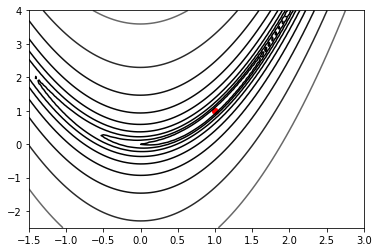

In [5]:
#Isolinien
def g(x,y):
    return f([x,y])

x   = np.linspace(-1.5, 3., 100)
y   = np.linspace(-2.5, 4., 100)
X,Y = np.meshgrid(x,y)
Z   = g(X, Y)
plt.contour(X, Y, Z, np.logspace(0,  3.5, 10, base = 10), cmap = 'gray')
plt.scatter([1],[1],color="red")
plt.show()

In [9]:
#Startpunkt und Tolerenz
eps   = 1e-6
x0    = [-1.2,1.0]

In [12]:
#Gradientenverfahren mit der Amijo-Regel
x     = x0
k     = 0 
while np.linalg.norm( grad(x) ) > eps:
    sigma = armijo(x,f,grad(x),-grad(x))
    x     = x - sigma*grad(x)
    k += 1
k    

14803

In [13]:
#Lokales Newton-Verfahren
x    = x0
k    = 0
while np.linalg.norm( grad(x) ) > eps:
    s = np.linalg.solve(hess(x),-grad(x))
    x = x + s
    k += 1
k    

2